In [ ]:
https://www.youtube.com/watch?v=9vszIR8pZHc

In [8]:
import numpy as np

g1_healthy = (1.+1.+.8+.7)/4
g2_healthy = (1.2+1.1+1.+1.1)/4
g3_healthy = (.5+.6+.4+.7)/4
g4_healthy = (.7+.4+.7+.9)/4
g5_healthy = (.2+.4+.3+.2)/4
g6_healthy = (.9+.7+.9+.5)/4
g7_healthy = (1.3+1.1+1.0+1.3)/4
g8_healthy = (.1+.3+.5+.1)/4

print(g1_healthy,g2_healthy,g3_healthy,g4_healthy,g5_healthy,g6_healthy,g7_healthy,g8_healthy)
print("mean healthy:",np.mean([g1_healthy,g2_healthy,g3_healthy,g4_healthy,g5_healthy,g6_healthy,g7_healthy,g8_healthy]))
print("var healthy:",np.var([g1_healthy,g2_healthy,g3_healthy,g4_healthy,g5_healthy,g6_healthy,g7_healthy,g8_healthy]))

g1_disease = (2.0+1.9+1.5+1.6)/4
g2_disease = (.6+.7+.5+.7)/4
g3_disease = (.1+.2+.2+.3)/4
g4_disease = (2.2+2.0+2.0+1.3)/4
g5_disease = (.3+.2+.5+.4)/4
g6_disease = (.1+.5+.2+.2)/4
g7_disease = (.9+1.5+.7+1.0)/4
g8_disease = (1.4+1.9+1.6+1.7)/4
#this is supposed to be normalized to a gaussian with mean 1 and variacne .5? This is not true. that 
#was a hypothetical example in the slides. we dont know what the mean is. 
print(g1_disease,g2_disease,g3_disease,g4_disease,g5_disease,g6_disease,g7_disease,g8_disease)
print("mean disease:",np.mean([g1_disease,g2_disease,g3_disease,g4_disease,g5_disease,g6_disease,g7_disease,g8_disease]))
print("var disease:",np.var([g1_disease,g2_disease,g3_disease,g4_disease,g5_disease,g6_disease,g7_disease,g8_disease]))

#rank the differences
diff=[("g1",g1_disease-g1_healthy),("g2",g2_disease-g2_healthy),("g3",g3_disease-g3_healthy),("g4",g4_disease-g4_healthy),
      ("g5",g5_disease-g5_healthy),
      ("g6",g6_disease-g6_healthy),("g7",g7_disease-g7_healthy),("g8",g8_disease-g8_healthy)]
diff.sort(key = lambda x: x[1],reverse=True)
print("diff:",diff)

0.875 1.1 0.55 0.675 0.275 0.75 1.175 0.25
mean healthy: 0.70625
var healthy: 0.10308593750000003
1.75 0.625 0.2 1.875 0.35 0.25 1.025 1.6500000000000001
mean disease: 0.965625
var disease: 0.43842773437500004
diff: [('g8', 1.4000000000000001), ('g4', 1.2), ('g1', 0.875), ('g5', 0.07499999999999996), ('g7', -0.15000000000000013), ('g3', -0.35000000000000003), ('g2', -0.4750000000000001), ('g6', -0.5)]


upstep: 1.7320508075688772 downstep: -0.5773502691896257
x: ('d', 1.55) [0] [0]
down: ('d', 1.55) running_sum: -0.5773502691896257 [0, 1] [0, -0.5773502691896257]
x: ('a', 0.95) [0, 1] [0, -0.5773502691896257]
down: ('a', 0.95) running_sum: -1.1547005383792515 [0, 1, 2] [0, -0.5773502691896257, -1.1547005383792515]
x: ('e', -0.050000000000000044) [0, 1, 2] [0, -0.5773502691896257, -1.1547005383792515]
down: ('e', -0.050000000000000044) running_sum: -1.7320508075688772 [0, 1, 2, 3] [0, -0.5773502691896257, -1.1547005383792515, -1.7320508075688772]
x: ('c', -0.4) [0, 1, 2, 3] [0, -0.5773502691896257, -1.1547005383792515, -1.7320508075688772]
down: ('c', -0.4) running_sum: -2.309401076758503 [0, 1, 2, 3, 4] [0, -0.5773502691896257, -1.1547005383792515, -1.7320508075688772, -2.309401076758503]
x: ('b', -0.5) [0, 1, 2, 3, 4] [0, -0.5773502691896257, -1.1547005383792515, -1.7320508075688772, -2.309401076758503]
down: ('b', -0.5) running_sum: -2.8867513459481287 [0, 1, 2, 3, 4, 5] [0, -0.5773

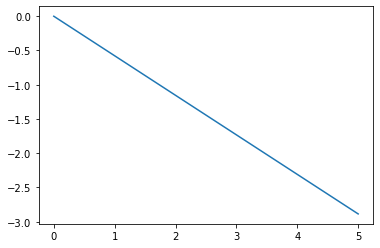

In [49]:
#https://www.science.org/doi/10.1126/scisignal.2001966
#the supplementary material is at this link. 
#this is the same as the table in the pdf
#    healthy
#    1.0
#    1.2
#    0.5
#    0.7
#    0.2
#    0.9
#    1.3
#    0.1
import math
import matplotlib.pyplot as plt
N=8 #total number of genes
G=2 #number of genes in candidate set, 
up_step = math.sqrt((N-G)/G)
down_step = math.sqrt(G/(N-G))
print("upstep:",up_step,"downstep:",-down_step)
#walk in the ordered high to low set of genes, if not in set go down, if up go up
candidate_set={'g2','g5'}
running_sum=0
x_coord=[0]
y_coord=[0]
for idx,x in enumerate(diff):
    print("x:",x,x_coord,y_coord)
    x_coord.append(idx+1) 
    if x[0] not in candidate_set:
        running_sum-=down_step
        y_coord.append(running_sum)
        print("down:",x,"running_sum:",running_sum,x_coord,y_coord)
    else:
        running_sum+=up_step
        y_coord.append(running_sum)
        print("up:",x,"running_sum:",running_sum,x_coord,y_coord)

print(x_coord,y_coord)
plt.plot(x_coord,y_coord)
plt.show()
#examples this is correct, the rank is 4 on the solutoin but we start graphing from 0. they start from 1
#file:///Users/dougchang/Downloads/2001966_answerkey%20(2).pdf

In [30]:
#permute labels


healthy: 1.0 1.15 0.55 0.55 0.30000000000000004
disease: 1.95 0.6499999999999999 0.15000000000000002 2.1 0.25
diff: [('d', 1.55), ('a', 0.95), ('e', -0.050000000000000044), ('c', -0.4), ('b', -0.5)]
up_step: 1.224744871391589  down_step: 0.816496580927726
x[0]: d
x[0]: a
x[0]: e
x[0]: c
x[0]: b
x_coord: [0, 1, 2, 3, 4, 5]  y_coord: [0, -0.816496580927726, -1.632993161855452, -2.449489742783178, -1.224744871391589, 0.0]


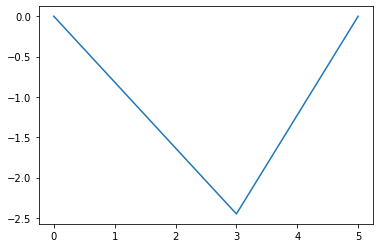

In [44]:
#smaller example
import  matplotlib.pyplot as plt

a_healthy=(1.+1.)/2
b_healthy=(1.2+1.1)/2
c_healthy=(.5+.6)/2
d_healthy=(.7+.4)/2
e_healthy=(.2+.4)/2

a_disease=(2.+1.9)/2
b_disease=(.6+.7)/2
c_disease=(.1+.2)/2
d_disease=(2.2+2.0)/2
e_disease=(.3+.2)/2

print("healthy:",a_healthy,b_healthy,c_healthy,d_healthy,e_healthy)
print("disease:",a_disease,b_disease,c_disease,d_disease,e_disease)
diff=[("a",a_disease-a_healthy),("b",b_disease-b_healthy),("c",c_disease-c_healthy),("d",d_disease-d_healthy),("e",e_disease-e_healthy)]
diff.sort(key = lambda x: x[1],reverse=True)
print("diff:",diff)
N=5
G=2
candidate_set={"b","c"}
up_step = math.sqrt((N-G)/G)
down_step = math.sqrt(G/(N-G))
print("up_step:",up_step," down_step:",down_step)
x_coord=[0]
y_coord=[0]
current_x=0
current_y=0
for idc,x in enumerate(diff):
    print("x[0]:",x[0])
    if x[0] not in candidate_set:
        current_x+=1
        x_coord.append(current_x)
        current_y -= down_step
        y_coord.append(current_y)
    else:
        current_x+=1
        x_coord.append(current_x)
        current_y+=up_step
        y_coord.append(current_y)
print("x_coord:",x_coord," y_coord:",y_coord)
plt.plot(x_coord,y_coord)
plt.show()

In [ ]:
#random walk
